In [1]:
from ete3 import Tree
import os
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

from physhapes.simulate import simulate_shapes
from physhapes.helper_functions import get_flat_values_sim


In [2]:
# load phylogeny 
tree = Tree('../data/chazot_subtree_rounded.nw')
print(tree)
# load root shape for simulation 
all_root = np.genfromtxt("centroid_size_sim_wing.csv", delimiter=",")#np.genfromtxt('../data/hercules_forewing_n=20.csv', delimiter=',')
root = all_root[0,:]  # use first shape as root


      /-niepelti
   /-|
  |   \-theseus
--|
  |   /-hercules
   \-|
     |   /-amphitryon
      \-|
         \-telemachus


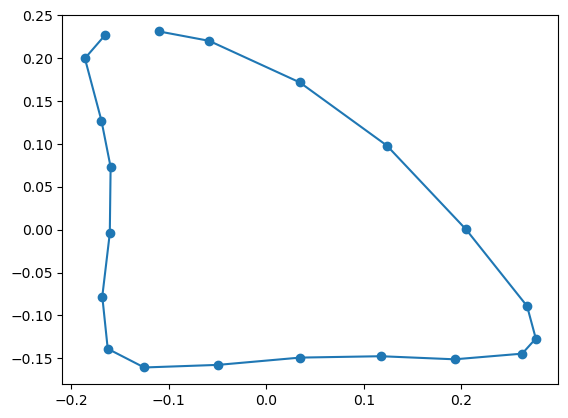

In [3]:
plt.plot(root[0::2], root[1::2], 'o-')

In [4]:
leafidx = []
inneridx = []
species = []
i = 0
for node in tree.traverse('levelorder'):
    if node.is_leaf():
        print(node.name)
        leafidx.append(i)
        species.append(node.name)
    else:
        inneridx.append(i)
    i+=1
print(leafidx)
print(inneridx)
print(species)

niepelti
theseus
hercules
amphitryon
telemachus
[3, 4, 5, 7, 8]
[0, 1, 2, 6]
['niepelti', 'theseus', 'hercules', 'amphitryon', 'telemachus']


In [5]:
ds = np.random.randint(0, 2**32)
sigma = 0.5
alpha = 0.005
dt = 0.05
outputpath = f'unit_root_sigma={sigma}_alpha={alpha}_dt={dt}/seed={ds}'
os.makedirs(outputpath, exist_ok=True)
simtree = simulate_shapes(ds=ds, dt=dt, sigma=sigma, alpha=alpha, root=root, tree=tree, rb=0)
flat_true_tree = np.array(get_flat_values_sim(simtree)) 
flat_true_tree.shape
#

(9, 40)

In [6]:
np.savetxt(f'{outputpath}/flat_true_tree.csv', flat_true_tree, delimiter=",")

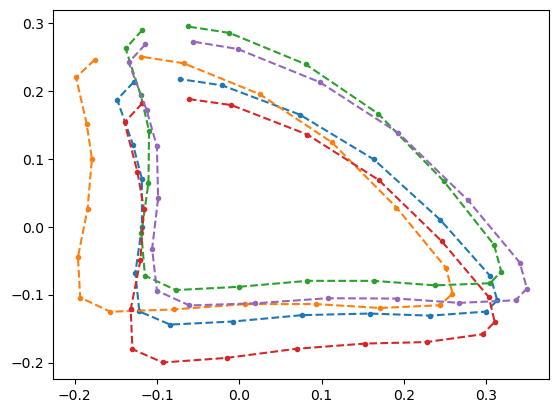

In [7]:
# show leaves 
[plt.plot(flat_true_tree[idx][0::2], flat_true_tree[idx][1::2], '--o', markersize=3, label='Simulated data') for idx in leafidx]
plt.savefig(f'{outputpath}/simulated_leaves.pdf', bbox_inches='tight')

In [8]:
leaves = pd.DataFrame(flat_true_tree[leafidx, :], index=species)
#leaves.columns = [['X'+str(i), 'Y'+str(i)] for i in range(leaves.shape[1] // 2)]
leaves.columns = [f'X{i}' if j % 2 == 0 else f'Y{i}' 
                  for i in range(leaves.shape[1] // 2) for j in range(2)]
print(leaves)
#path = f'comparison/seed={ds}_sigma={sigma}_alpha={alpha}_dt={dt}'
#os.makedirs(path, exist_ok=True)
leaves.to_csv(f'{outputpath}/leaves.csv', index=False, header=False)
flat_true_tree_df = pd.DataFrame(flat_true_tree)
flat_true_tree_df.to_csv(f'{outputpath}/flat_true_tree.csv', index=False, header=False)

                  X0        Y0        X1        Y1        X2        Y2  \
niepelti   -0.128365  0.212740 -0.148377  0.187186 -0.129012  0.120291   
theseus    -0.175790  0.245648 -0.198332  0.219620 -0.185348  0.151302   
hercules   -0.118049  0.289077 -0.138127  0.262386 -0.119654  0.193377   
amphitryon -0.117827  0.181673 -0.139422  0.153398 -0.123678  0.080517   
telemachus -0.114142  0.268282 -0.134390  0.241766 -0.112473  0.171313   

                  X3        Y3        X4        Y4  ...       X15       Y15  \
niepelti   -0.118304  0.070597 -0.118313 -0.000314  ...  0.244289  0.009992   
theseus    -0.178989  0.100015 -0.184301  0.026250  ...  0.191018  0.028226   
hercules   -0.109576  0.140980 -0.110347  0.064619  ...  0.248761  0.066640   
amphitryon -0.115854  0.026671 -0.120110 -0.049593  ...  0.245829 -0.021130   
telemachus -0.100067  0.118187 -0.098604  0.041628  ...  0.278080  0.038734   

                 X16       Y16       X17       Y17       X18       Y18  \
niepel